<a href="https://www.kaggle.com/code/nainapandey96/hierarchical-clustering-shopping-customers?scriptVersionId=98689268" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Customer Segmentation using hierarchical clustering method

Data can be of many types as we know. One type is unlabeled data. To solve the problem which contains unlabeled data we go for unsupervised learning. Clustering is one such method. Identifying similarities in groups is called clustering. Grouping objects is based on the information found in data that describes the object or their relationship.

<img src='https://cdn-images-1.medium.com/max/1200/1*3tRMXSq6P5IzxsKjPYYe6Q.png'>

Why do we need clustering?
1. To determine the intrinsic grouping in the unlabeled data.
2. To organize the data into clusters showing the internal structure of the data.
3. To partition the data points.
4. To understand and extract value from large sets of structured and unstructured data.

We have different types of clustering.

<img src='https://cdn-images-1.medium.com/max/1200/1*Ewg7z7YxEXbjECkHPdtrvA.png'>

## Hierarchical Clustering Algorithm(HCA)

In this algorithm, we develop the hierarchy of clusters in the form of a tree, and this tress is known as the dendrogram(in greek, dendro- Tree, and gramma- diagram). It outputs a more informative structure than the unstructured set of clusters returned by flat clustering.
K-Means and HCA may look similar to many but they differ in their way of working. In K-Means, there is a requirement of a predetermined number of clusters and it also tries to make clusters of the same size, which is not the case with HCA. 

There are two approaches to hierarchical clustering:
* Agglomerative: Bottom-up approach
* Divisive: Top-down approach

### **How does hierarchical clustering work?**
1. Assign each item to its cluster such that if you have N no of items, now you have N no of clusters.
2. Find the closest (most similar) pair of clusters and merge them. Now there is one less cluster.
3. Compute the distance(similarity) between the new and every old cluster. 
4. Repeat steps 2 and 3 until all items are clustered into a single cluster of size N.

<img src='https://cdn-images-1.medium.com/max/1200/1*VbnIgT5uXUibCEShGs1bnQ.png'>

## How do measure distance?
We have four types of distance measures.
* Single Linkage Measure: Minimum possible distance between two points belonging to two different clusters.
* Complete Linkage: Maximum possible distance between two points belonging to two different clusters.
* Average/Mean Linkage: Find all possible distances pairwise for points belonging to two different clusters and then calculate their average.
* Centroid Linkage: Find centroids of each cluster and calculate the distance between them.

Lets implement it:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### DESCRIPTION
This is our dataset info
An e-commerce company has prepared a rough dataset containing shopping
details of it customers, which include CustomerID, Genre, Age, Annual Income (k$), and
Spending Score (1-100). The company is unable to target a specific set of customers with a particular
set of SKUs.

*Objective*: Segment customers into different groups based on their shopping trends.

In [2]:
df_shop=pd.read_csv("../input/data-ml-superdatascience/data_ml_superdatascience/Mall_Customers.csv")

In [3]:
df_shop.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df_shop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
#we will only take annual income and spending score values
feature= df_shop.iloc[:,3:5].values


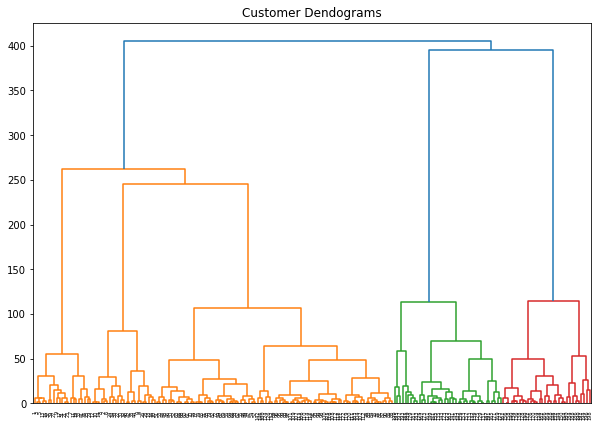

In [6]:
#creating dendogram
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10,7))
plt.title('Customer Dendograms')
dend=shc.dendrogram(shc.linkage(feature,method='ward'))

In the dendrogram plot, the Y-axis shows the Euclidean distances between the data points, and the x-axis shows all the data points of the given dataset. Using this diagram we can find the optimal number of clusters after finding the maximum vertical distance. We can see that on y label starting from 100 to 250 is the maximum vertical distance with 5 classes (5 vertical lines), so our n_clusters =5.
We will be implementing clustering using an agglomerative approach. We will import AgglomerativeClustering class of the cluster module of the scikit learn library.

In [7]:
#we will now use agglomerative clustering
from sklearn.cluster import AgglomerativeClustering
cluster=AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
cluster.fit_predict(feature)

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

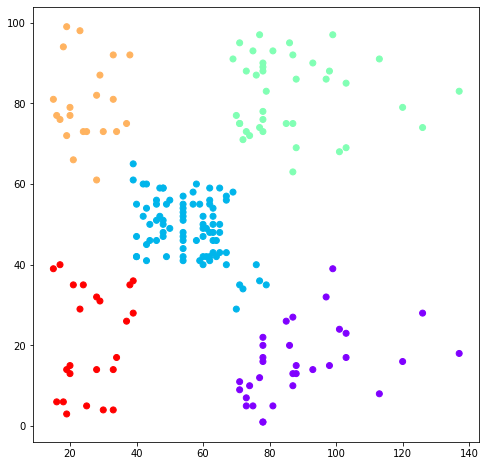

In [8]:
plt.figure(figsize=(8,8))
plt.scatter(feature[:,0], feature[:,1], c= cluster.labels_, cmap='rainbow')

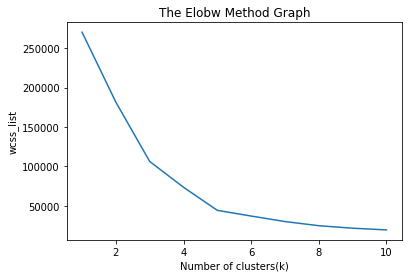

In [9]:
# we will try k mean algo now for that we need to import library and create list to calculate WCSS( within cluster Sum of Squares)
from sklearn.cluster import KMeans
wcss=[] # intializing list for wcss
for i in range(1, 11):  
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)  
    kmeans.fit(feature)  
    wcss.append(kmeans.inertia_)  
plt.plot(range(1, 11), wcss)  
plt.title('The Elobw Method Graph')  
plt.xlabel('Number of clusters(k)')  
plt.ylabel('wcss_list')  
plt.show()  

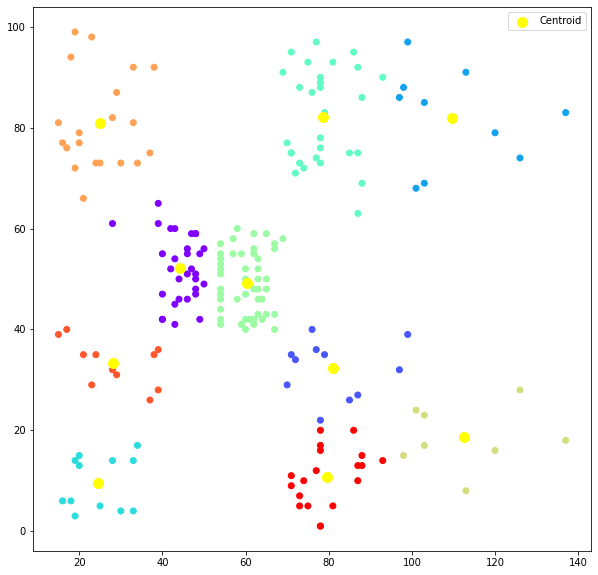

In [10]:
#we can see that 5 is where elbow is forming
plt.figure(figsize=(10,10))
plt.scatter(feature[:,0], feature[:,1], c= kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'yellow', label = 'Centroid')   
plt.legend()  
plt.show()  

# Conclusion
So we learned what is clustering and specifically about hierarchical clustering. I like dendrograms since they are very informative. I will encourage you guys to implement this and also try to implement it using the K Means. You will be able to show centroid in K-Means as well. Please let me know if you found this article useful. 

Happy coding!!!